In [1]:
import tensorflow as tf
import datetime

In [2]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [4]:
import pandas as pd
circles=pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [5]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

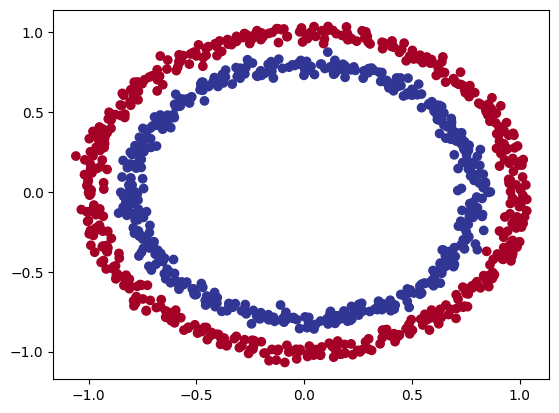

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.4766 - loss: 3.9326 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5320 - loss: 0.7314
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.5166 - loss: 0.6980
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.5203 - loss: 0.6928
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5163 - loss: 0.6923


In [9]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

Model 2

In [10]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
model_2.fit(X,y,epochs=100,verbose=0)

In [11]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.5161 - loss: 0.6920


[0.693630039691925, 0.49399998784065247]

model3

In [12]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

In [13]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.5046 - loss: 0.6924


[0.6947013735771179, 0.4860000014305115]

Creates a meshgrid of the different X values.

In [14]:
import numpy as np
def plot_decision_boundary(model,X,y):
    x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
    y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
    
    x_in=np.c_[xx.ravel(),yy.ravel()]
    y_pred=model.predict(x_in)
    if model.output_shape[-1]>1:
        print('doing multiclass classification...')
    else:
        print('doing binary classification')
        y_pred=np.round(np.max(y_pred,axis=1)).reshape(xx.shape)
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
doing binary classification


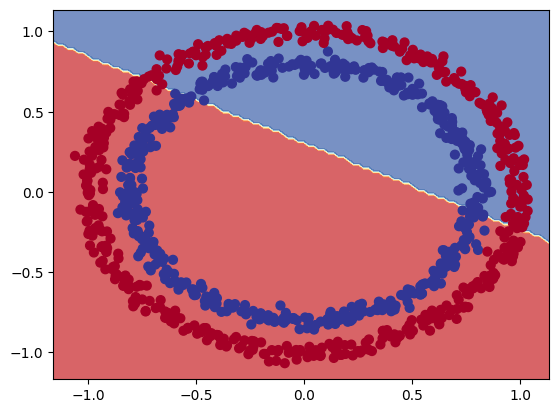

In [15]:
plot_decision_boundary(model_3,X,y)

Model 4 Nonlinear

In [16]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.4824 - loss: 1.3535 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.4469 - loss: 0.9874
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.3969 - loss: 0.8857
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.3432 - loss: 0.8356
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.3708 - loss: 0.8081
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.4093 - loss: 0.7870
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.4451 - loss: 0.7695
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.4635 - loss: 0.7481
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.4584 - loss: 0.7332
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.4407 - loss: 0.7218
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.4563 - loss: 0.7103
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
model_4.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9752 - loss: 0.1932


[0.18508929014205933, 0.9700000286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
doing binary classification


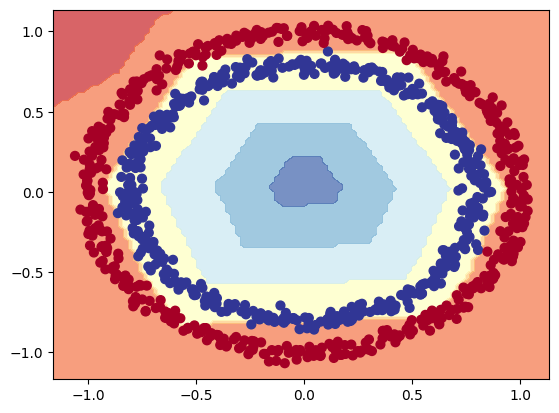

In [18]:
plot_decision_boundary(model_4,X,y)

model 5

In [19]:
tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history1=model_5.fit(X,y,epochs=100,verbose=0)

In [20]:
model_5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9996 - loss: 0.1763


[0.17158642411231995, 0.9980000257492065]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
doing binary classification


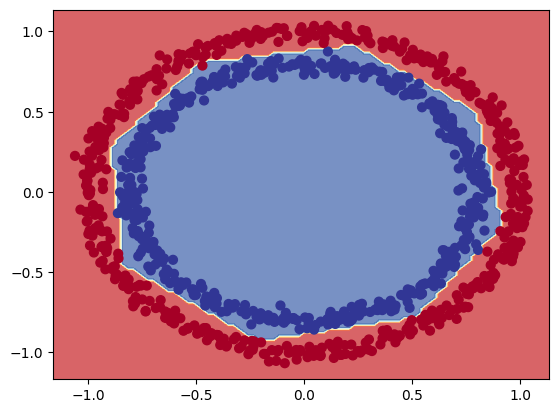

In [21]:
plot_decision_boundary(model_5,X,y)

Evaluating and improving our classification model

In [22]:
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

X_train.shape,X_test.shape

((800, 2), (200, 2))

In [23]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
history=model_6.fit(X_train,y_train,epochs=25)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.5089 - loss: 0.6949 
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.5024 - loss: 0.6904
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.5249 - loss: 0.6871
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.5345 - loss: 0.6830
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.5429 - loss: 0.6752
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.5822 - loss: 0.6643
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6113 - loss: 0.6499
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.6408 - loss: 0.6264
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.6650 - loss: 0.5975
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.7281 - loss: 0.5631
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.7756 - loss: 0.5098
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/ste

In [24]:
loss,accuracy=model_6.evaluate(X_test,y_test)
print(f'Model loss on the test set:{loss}')
print(f'Model accuracy on the test set:{accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.9413 - loss: 0.1955
Model loss on the test set:0.18888281285762787
Model accuracy on the test set:0.9449999928474426


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
doing binary classification


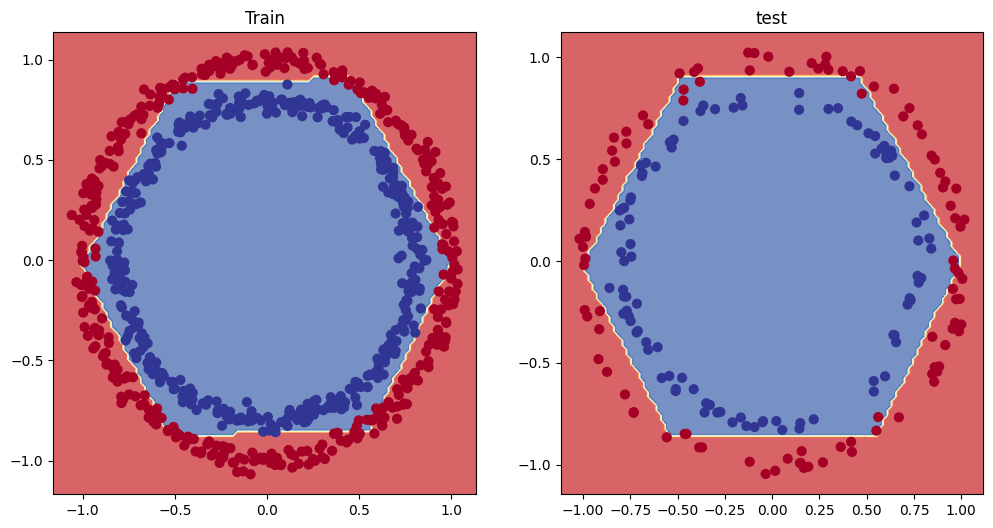

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_6,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_6,X_test,y_test)
plt.show()

In [26]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.49125,0.695958
1,0.49375,0.690706
2,0.51875,0.687848
3,0.52375,0.682752
4,0.57000,0.672037
5,0.61250,0.657966
6,0.65125,0.640473
7,0.67750,0.615675
8,0.72125,0.585639
9,0.76500,0.546433


Text(0.5, 1.0, 'Model_6 training curves')

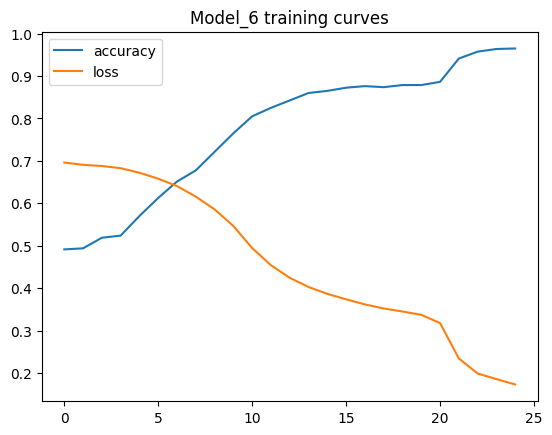

In [27]:
pd.DataFrame(history.history).plot()
plt.title('Model_6 training curves')

Find the best learning rate

In [28]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
history=model_7.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.4976 - loss: 0.6887 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.5059 - loss: 0.6886 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.5073 - loss: 0.6886 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.5124 - loss: 0.6885 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.5104 - loss: 0.6884 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.5047 - loss: 0.6884 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.5164 - loss: 0.6883 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.5144 - loss: 0.6882 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.5126 - loss: 

<Axes: xlabel='epochs'>

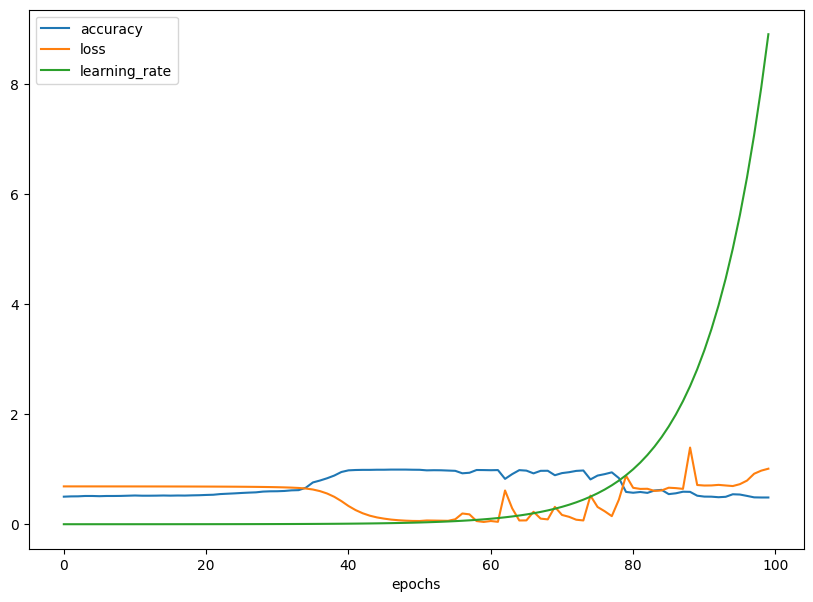

In [29]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs. loss')

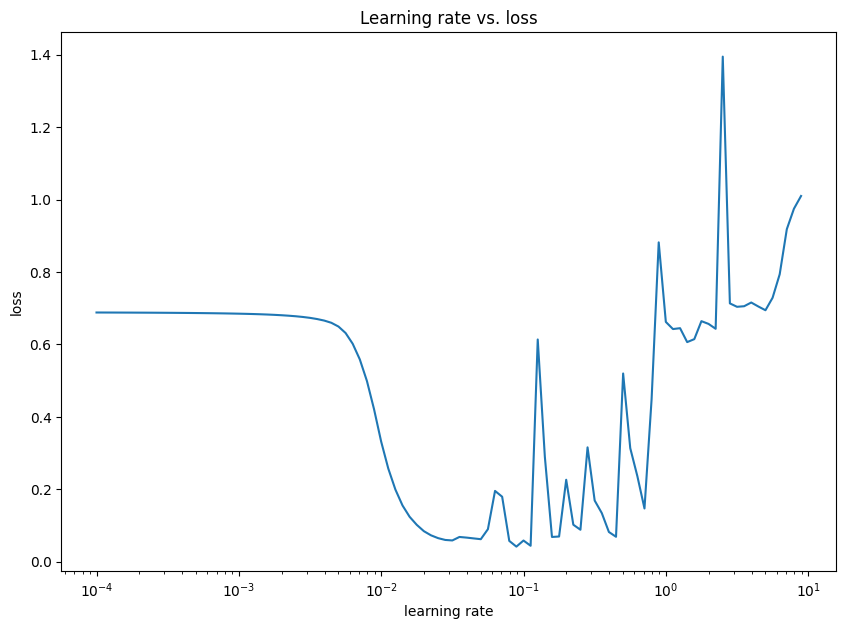

In [30]:
lrs=1e-4*(10**(np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Learning rate vs. loss')

In [31]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])
history=model_8.fit(X_train,y_train,epochs=25)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.4966 - loss: 0.6948 
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.5286 - loss: 0.6869
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.5537 - loss: 0.6756
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.6005 - loss: 0.6498
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.6607 - loss: 0.6121
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6757 - loss: 0.5779
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.7088 - loss: 0.5391
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8160 - loss: 0.4131
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.9101 - loss: 0.2929
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.9509 - loss: 0.2016
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.9732 - loss: 0.1453
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/ste

In [32]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.9860 - loss: 0.0642


[0.06295505166053772, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
doing binary classification


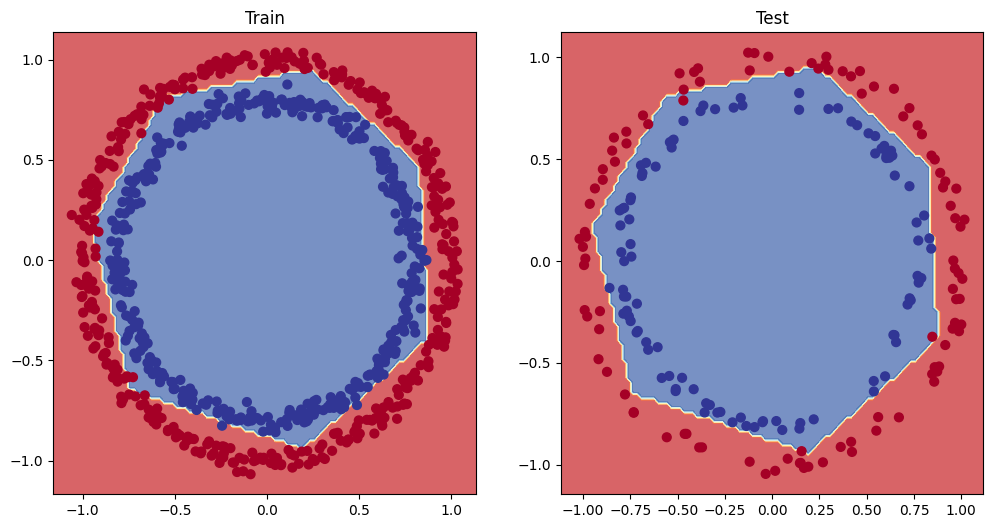

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [34]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.9860 - loss: 0.0642
Model loss on test set: 0.06295505166053772
Model accuracy on test set: 98.50%


In [36]:
from sklearn.metrics import confusion_matrix
y_preds=model_8.predict(X_test)
confusion_matrix(y_test,tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


array([[98,  3],
       [ 0, 99]], dtype=int64)

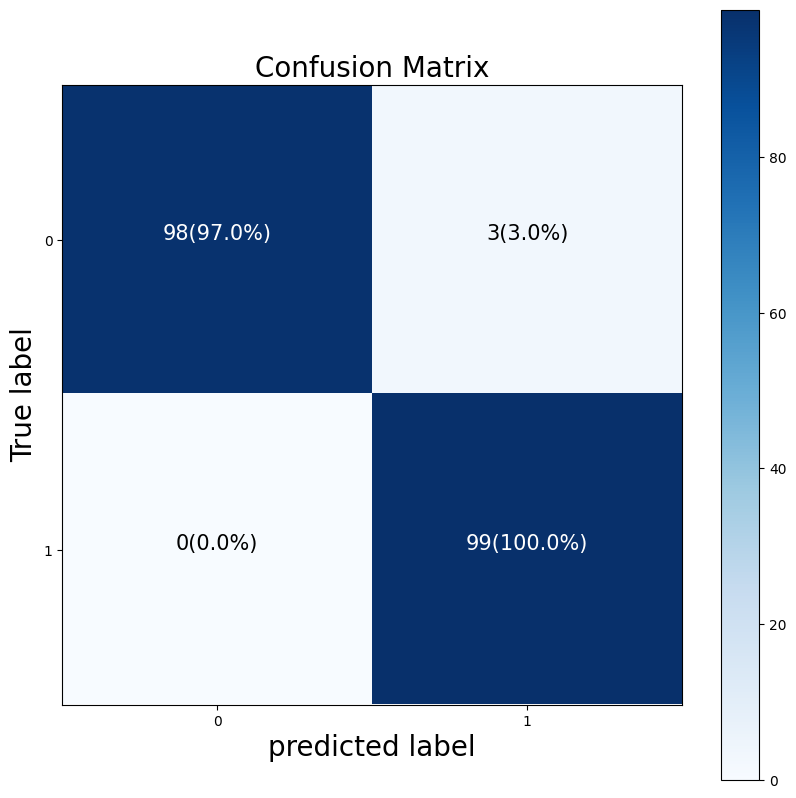

In [38]:
import itertools
figsize=(10,10)
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]
fig,ax=plt.subplots(figsize=figsize)
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

classes=False
if classes:
    labels=classes
else:
    labels=np.arange(cm.shape[0])

ax.set(title='Confusion Matrix',
       xlabel='predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold=(cm.max()+cm.min())/2

for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment='center',
             color='white' if cm[i,j]>threshold else 'black',
             size=15)